> If you went through some of the exercises in the previous chapters, you may have been surprised by how much you can get done without knowing anything about what’s under the hood.

> However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently.

# Linear Regression

## The Normal Equation

![](http://upload.ouliu.net/i/201901141428571t24n.png)

In [6]:
import numpy as np
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

X_b = np.c_[np.ones(shape=(100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.06489854],
       [3.17765432]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones(shape=(2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.06489854],
       [10.42020718]])

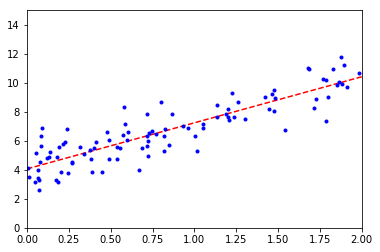

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new,y_pred,'r--')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [14]:
#using Scikit-Learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.06489854],
       [10.42020718]])

### Computational Complexity
> The Normal Equation computes the inverse of XT · X, which is an n × n matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3) (depending on the implementation). In other words, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

## Gradient Descent
> An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

💡When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

## Batch Gradient Descent

In [16]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
        gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients

In [17]:
theta

array([[4.06489854],
       [3.17765432]])

`Strategy of iterations setting`

💡A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny — that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

## Stochastic Gradient Descent
> randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is called simulated annealing, because it resembles the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule.

In [20]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients

In [21]:
theta

array([[4.01054539],
       [3.25521108]])

`using ScikitLearn`

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [27]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.03641043]), array([3.14938403]))

## Mini-batch Gradient Descent

![](http://upload.ouliu.net/i/20190114160539iheyk.png)